In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from PIL import Image

# Path to the dataset directory
dataset_dir = "./leapGestRecog"

# Initialize lists to store images and labels
images = []
labels = []
img_size = (64, 64)  # Resize images to 64x64 pixels

# Recursively traverse through all nested directories
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        if file.endswith(".png") or file.endswith(".jpg"):
            img_path = os.path.join(root, file)
            try:
                img = Image.open(img_path)
                img = img.resize(img_size)  # Resize the image
                img = np.array(img)
                images.append(img)
                # Extract label from the directory name
                label = os.path.basename(os.path.dirname(img_path))
                labels.append(label)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")

print(f"Total images loaded: {len(images)}")
print(f"Total labels loaded: {len(labels)}")

if len(images) == 0:
    raise ValueError("No images were loaded. Please check the dataset directory.")

# Convert lists to arrays
images = np.array(images)
labels = np.array(labels)

# Normalize the images
images = images / 255.0

# Encode labels (e.g., '01_palm' -> 0, '02_l' -> 1, ...)
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Convert labels to one-hot encoding
labels = to_categorical(labels, num_classes=len(np.unique(labels)))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


Total images loaded: 40000
Total labels loaded: 40000


In [27]:
import numpy as np

# Add channel dimension for grayscale images
X_train = np.expand_dims(X_train, axis=-1)  # Shape will be (32000, 64, 64, 1)
X_test = np.expand_dims(X_test, axis=-1)  # Shape will be (8000, 64, 64, 1)

print(f"Updated Shape of X_train: {X_train.shape}")
print(f"Updated Shape of X_test: {X_test.shape}")

Updated Shape of X_train: (32000, 64, 64, 1)
Updated Shape of X_test: (8000, 64, 64, 1)


In [29]:
model = Sequential()

# Convolutional layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D((2, 2)))

# Convolutional layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Convolutional layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output
model.add(Flatten())

# Fully connected layer 1
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Fully connected layer 2 (output layer)
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,914 (2.61 MB)

 Trainable params: 683,914 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Data augmentation to improve model performance
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
)

# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=20,
    validation_data=(X_test, y_test)
)

Epoch 1/20


C:\Users\Abel\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 47s 44ms/step - accuracy: 0.5957 - loss: 1.1080 - val_accuracy: 0.9653 - val_loss: 0.1038
Epoch 2/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 50s 50ms/step - accuracy: 0.9420 - loss: 0.1730 - val_accuracy: 0.9821 - val_loss: 0.0500
Epoch 3/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 48s 48ms/step - accuracy: 0.9752 - loss: 0.0824 - val_accuracy: 0.9989 - val_loss: 0.0057
Epoch 4/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 48s 47ms/step - accuracy: 0.9803 - loss: 0.0672 - val_accuracy: 0.9985 - val_loss: 0.0062
Epoch 5/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 46s 45ms/step - accuracy: 0.9841 - loss: 0.0472 - val_accuracy: 0.9995 - val_loss: 0.0014
Epoch 6/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 47s 47ms/step - accuracy: 0.9874 - loss: 0.0386 - val_accuracy: 0.9970 - val_loss: 0.0131
Epoch 7/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 47s 47ms/step - accuracy: 0.9893 - loss: 0.0358 - val_accuracy: 0.9964 - val_loss: 0.0082
Epoch 8/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 46s 46ms/step - accuracy: 0.9935 - loss: 0.02

250/250 - 3s - 10ms/step - accuracy: 1.0000 - loss: 8.1927e-05
Test Accuracy: 1.0000


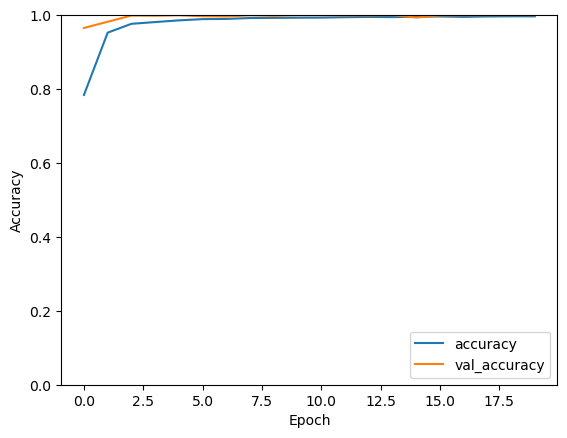

In [33]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
model.save("hand_gesture_recognition_model.h5")